In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(15,10)
from sklearn.metrics import f1_score,precision_score,roc_auc_score,recall_score
from sklearn.model_selection import StratifiedKFold

In [70]:
data_1=pd.read_csv(r"C:\Users\Daniel Ayiku George\Desktop\DATA SCIENCE\DATA\NEW PROJECTS\CHURN PREDICTION\churn-bigml-80.csv")
data_2=pd.read_csv(r"C:\Users\Daniel Ayiku George\Desktop\DATA SCIENCE\DATA\NEW PROJECTS\CHURN PREDICTION\churn-bigml-20.csv")

In [71]:
data=pd.concat([data_1,data_2], ignore_index=True)

In [72]:
print('The shape of the data before and after Concatenating:',
     '\nOld data:',data_1.shape,
     '\nOld data:',data_2.shape,
     '\nNew data:',data.shape)


The shape of the data before and after Concatenating: 
Old data: (2666, 20) 
Old data: (667, 20) 
New data: (3333, 20)


In [73]:
df=data.copy(deep=True)
df.head(10)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   
5    AL             118        510                Yes              No   
6    MA             121        510                 No             Yes   
7    MO             147        415                Yes              No   
8    WV             141        415                Yes             Yes   
9    RI              74        415                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   
7                      0              157.0               79   
8                     37              258.6               84   
9                      0              187.7              127   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   
6             37.09              348.5              108             29.62   
7             26.69              103.1               94              8.76   
8             43.96              222.0              111             18.87   
9             31.91              163.4              148             13.89   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                326.4                 97               14.69   
9                196.0                 94                8.82   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                11.2                 5               3.02   
9                 9.1                 5               2.46   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6

In [74]:
df.duplicated().sum()

0

In [75]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [77]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

<Axes: xlabel='International plan', ylabel='count'>

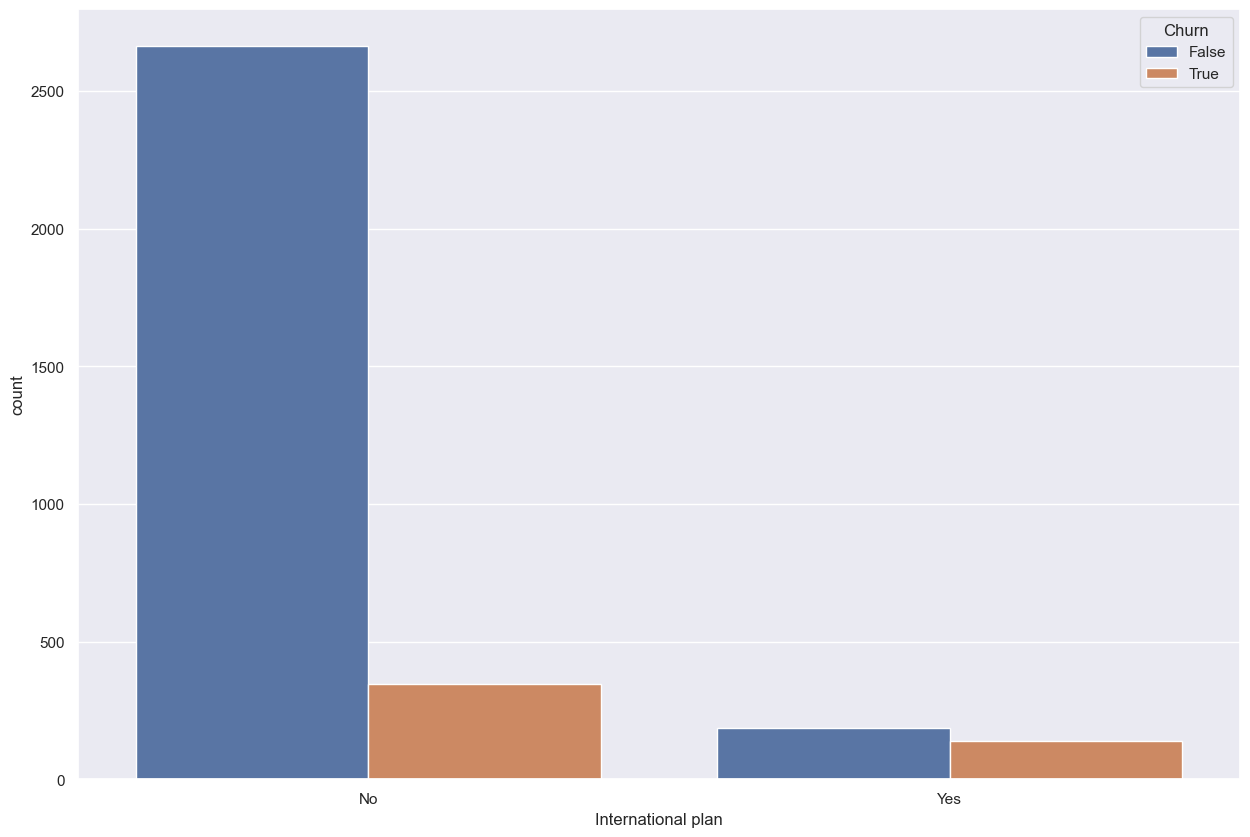

In [78]:
#the distribution of International plan against Churn
sns.countplot(data=df,x="International plan",hue='Churn')

<Axes: xlabel='Voice mail plan', ylabel='count'>

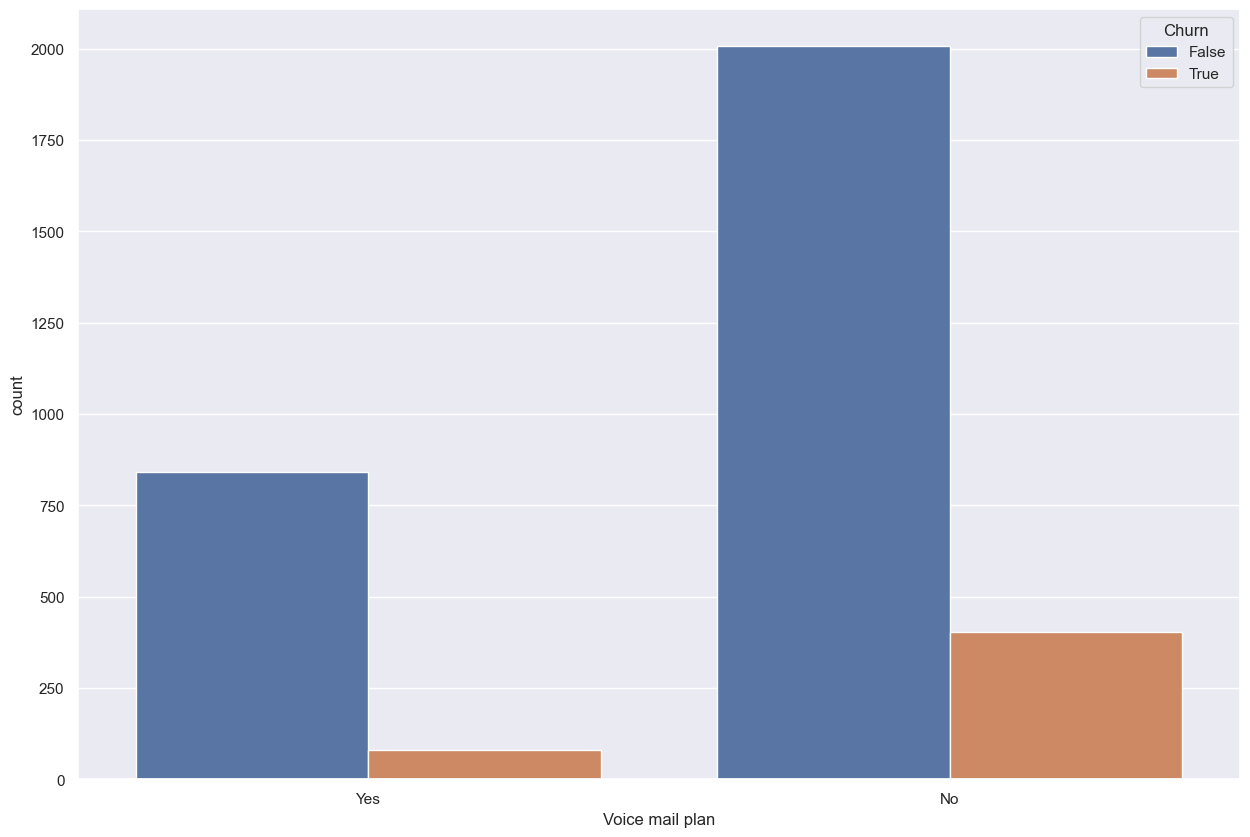

In [79]:
#
sns.countplot(data=df,x="Voice mail plan",hue='Churn')

array([[<Axes: title={'center': 'Account length'}>,
        <Axes: title={'center': 'Area code'}>,
        <Axes: title={'center': 'Number vmail messages'}>,
        <Axes: title={'center': 'Total day minutes'}>],
       [<Axes: title={'center': 'Total day calls'}>,
        <Axes: title={'center': 'Total day charge'}>,
        <Axes: title={'center': 'Total eve minutes'}>,
        <Axes: title={'center': 'Total eve calls'}>],
       [<Axes: title={'center': 'Total eve charge'}>,
        <Axes: title={'center': 'Total night minutes'}>,
        <Axes: title={'center': 'Total night calls'}>,
        <Axes: title={'center': 'Total night charge'}>],
       [<Axes: title={'center': 'Total intl minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>,
        <Axes: title={'center': 'Total intl charge'}>,
        <Axes: title={'center': 'Customer service calls'}>]], dtype=object)

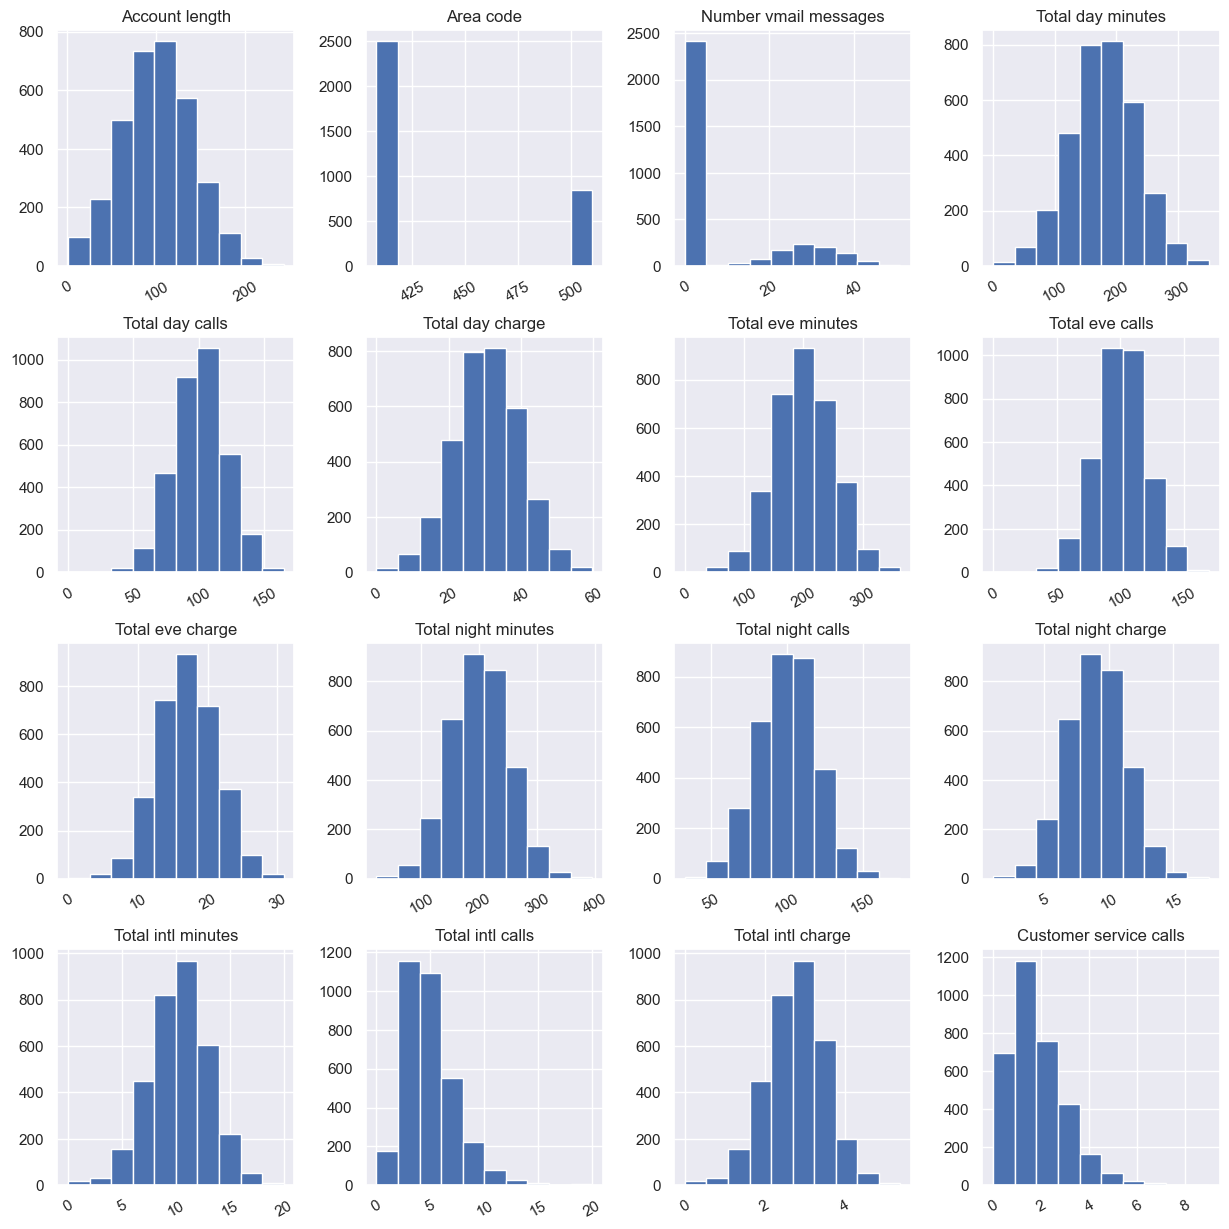

In [80]:
df.hist(figsize=(15,15), xrot=30)

In [81]:
df.skew()

Account length            0.096606
Area code                 1.126823
Number vmail messages     1.264824
Total day minutes        -0.029077
Total day calls          -0.111787
Total day charge         -0.029083
Total eve minutes        -0.023877
Total eve calls          -0.055563
Total eve charge         -0.023858
Total night minutes       0.008921
Total night calls         0.032500
Total night charge        0.008886
Total intl minutes       -0.245136
Total intl calls          1.321478
Total intl charge        -0.245287
Customer service calls    1.091359
Churn                     2.018356
dtype: float64

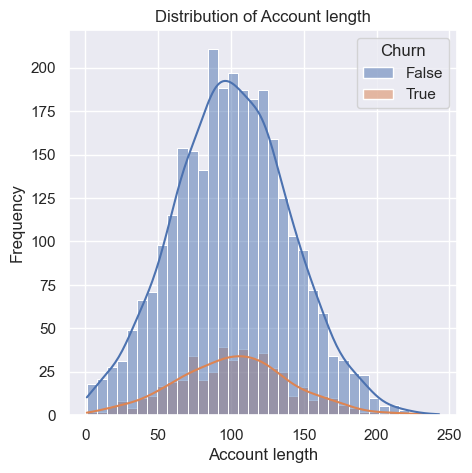

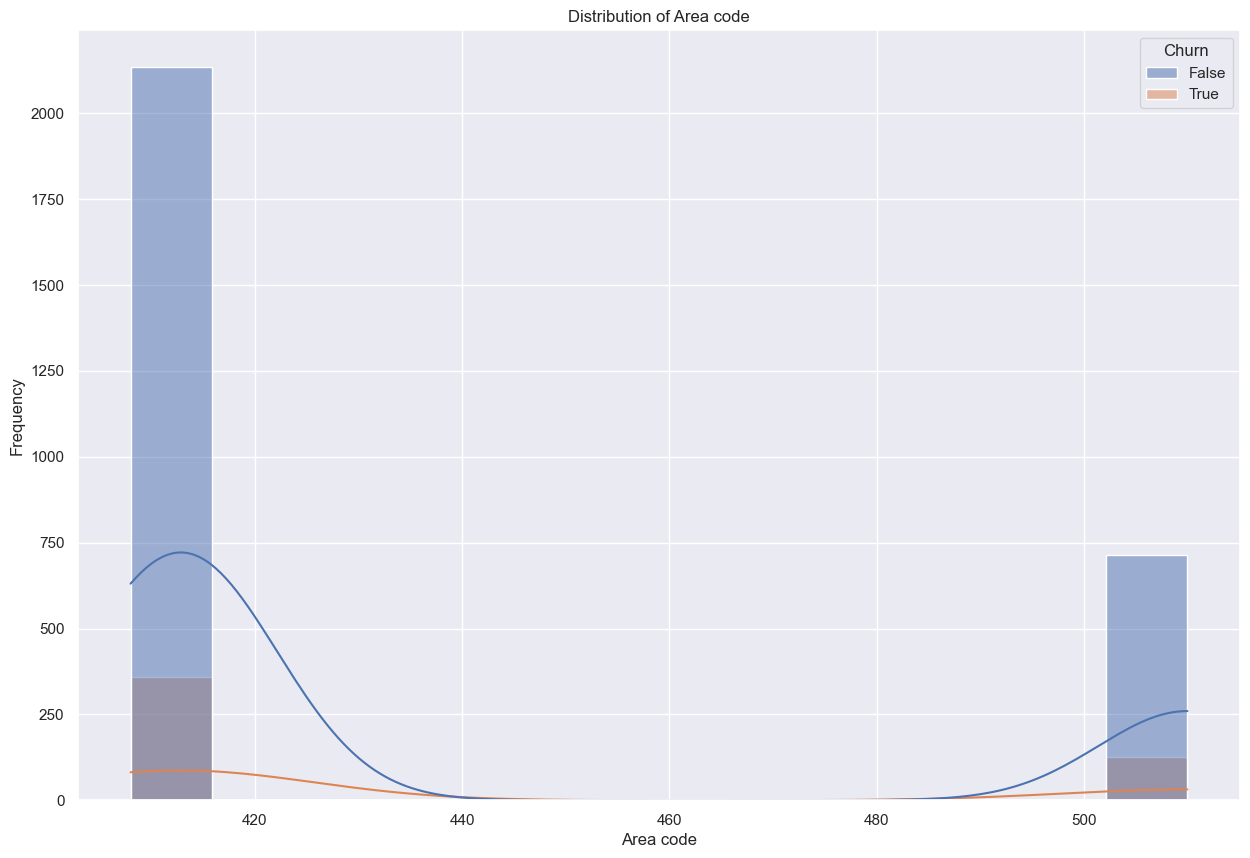

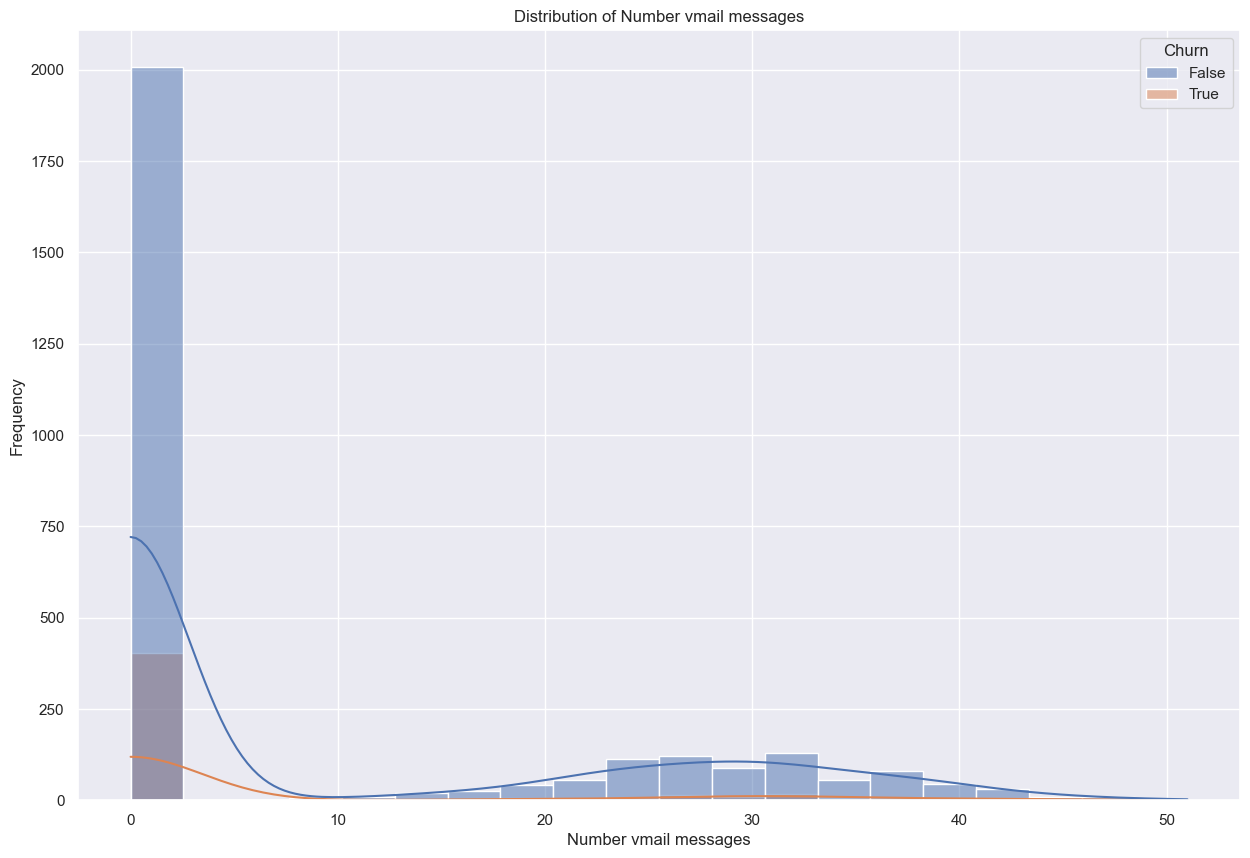

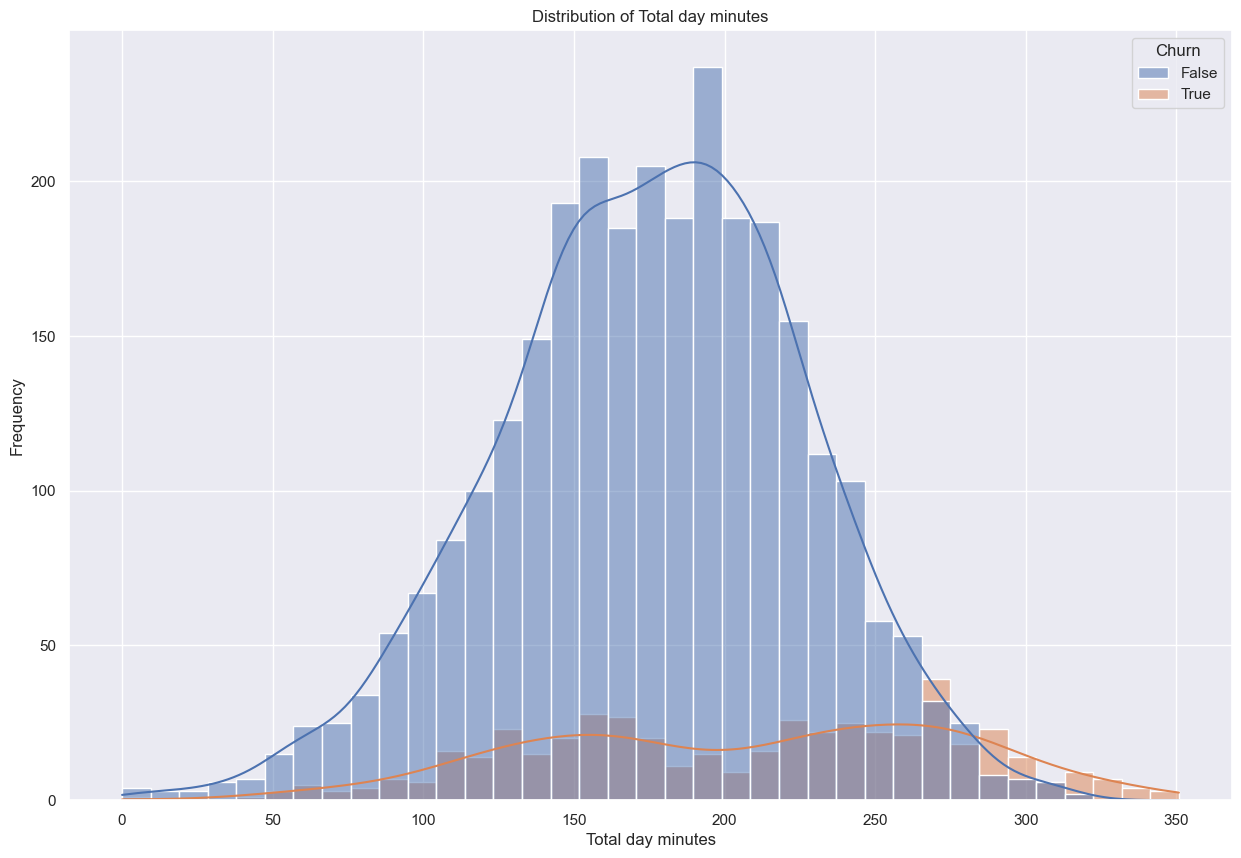

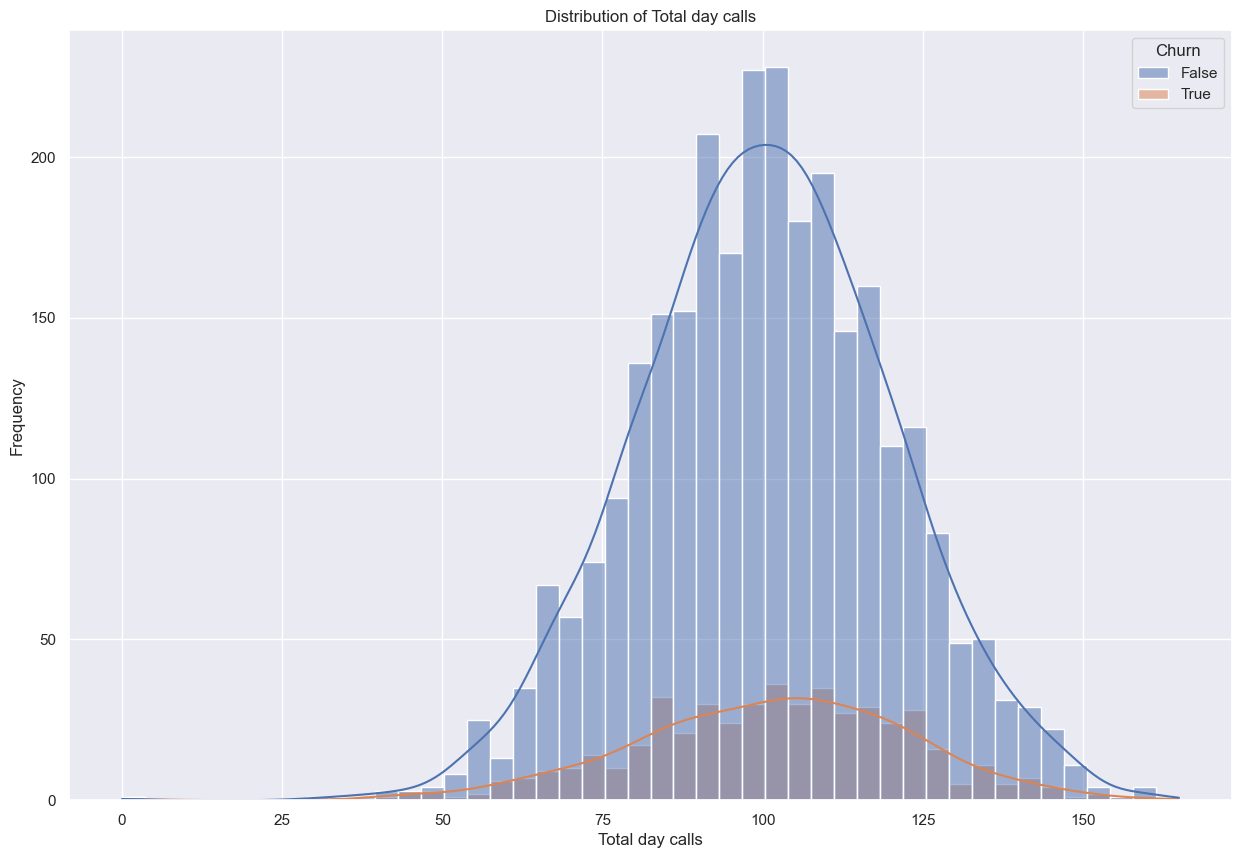

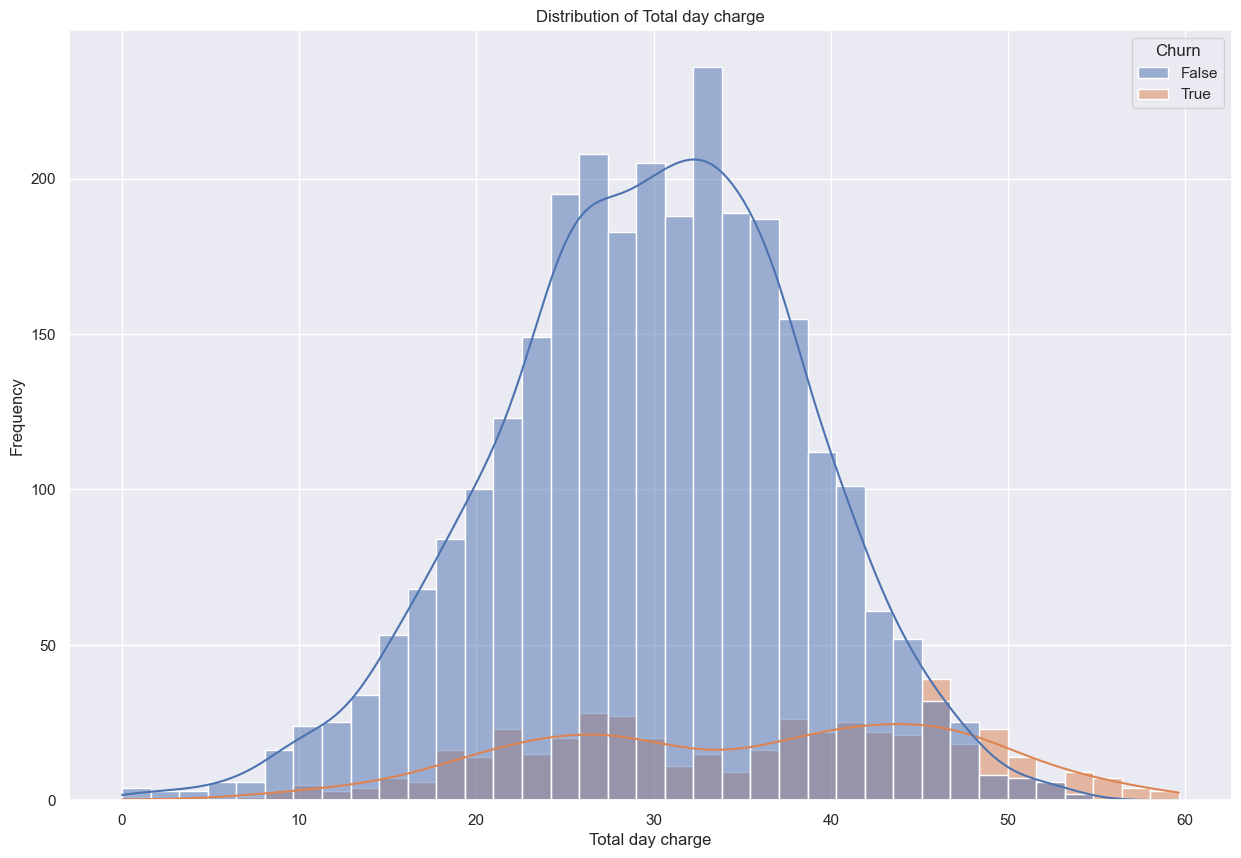

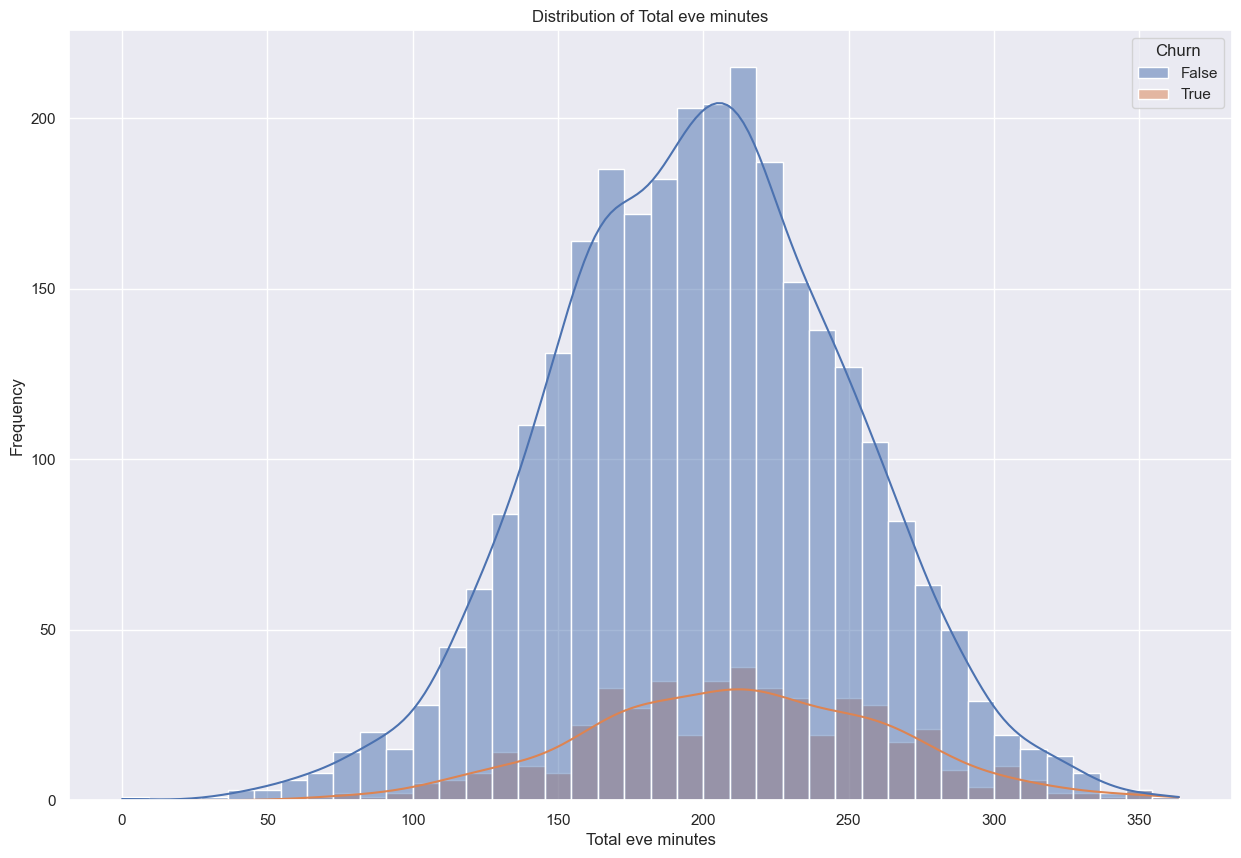

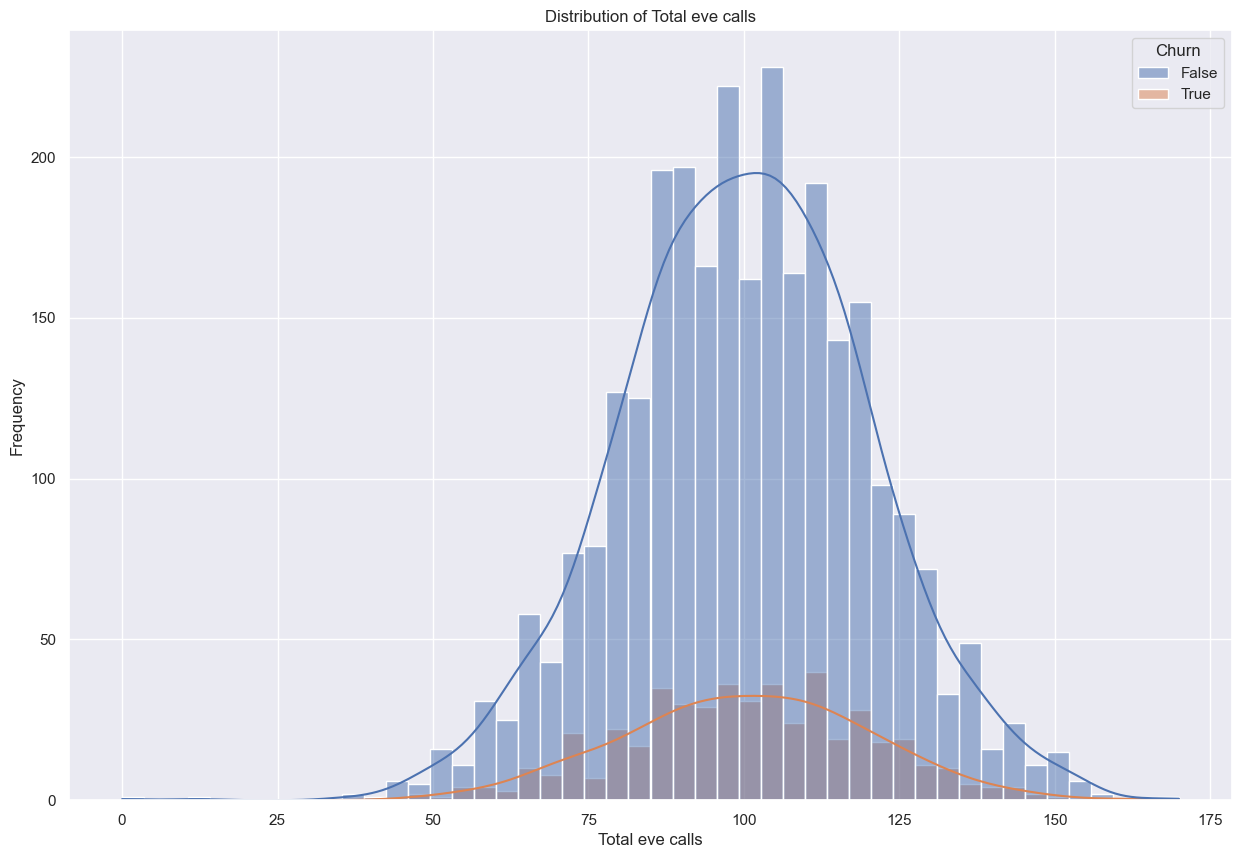

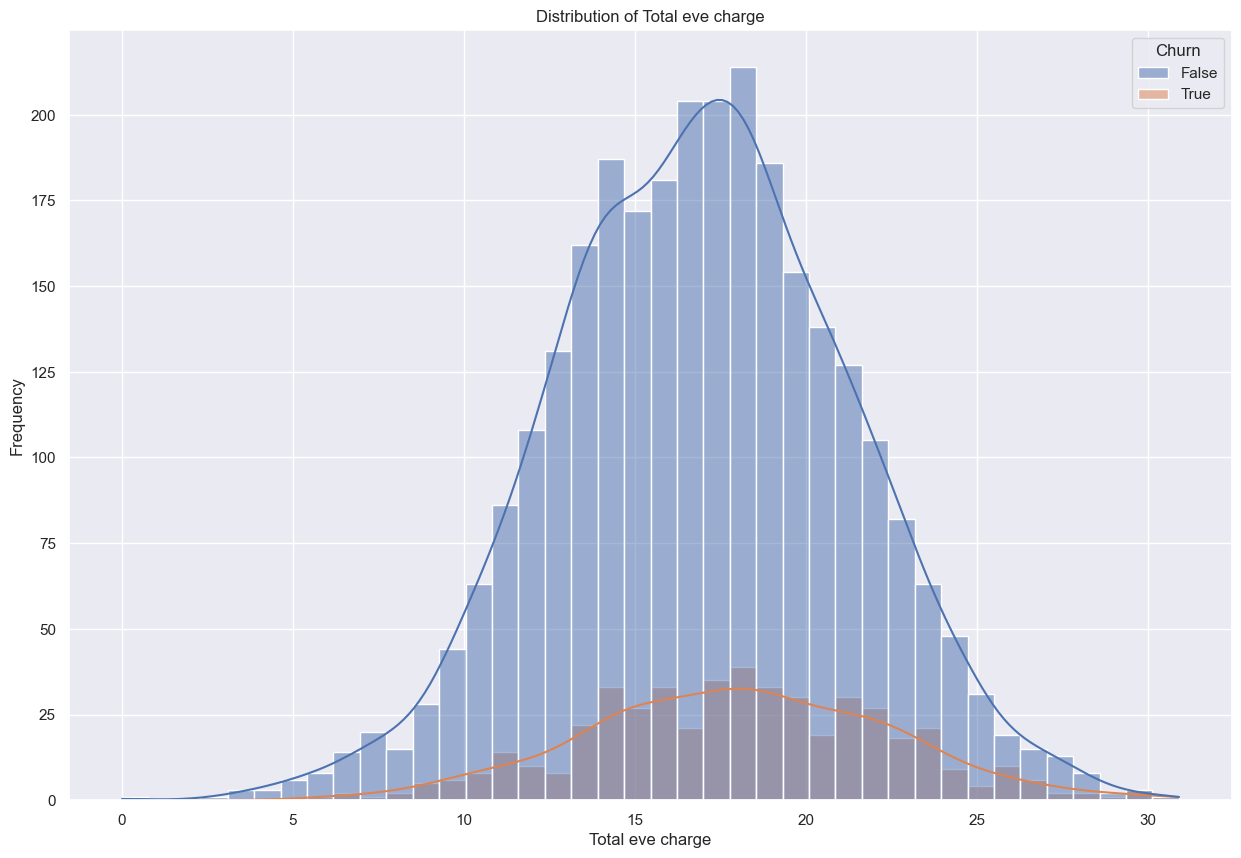

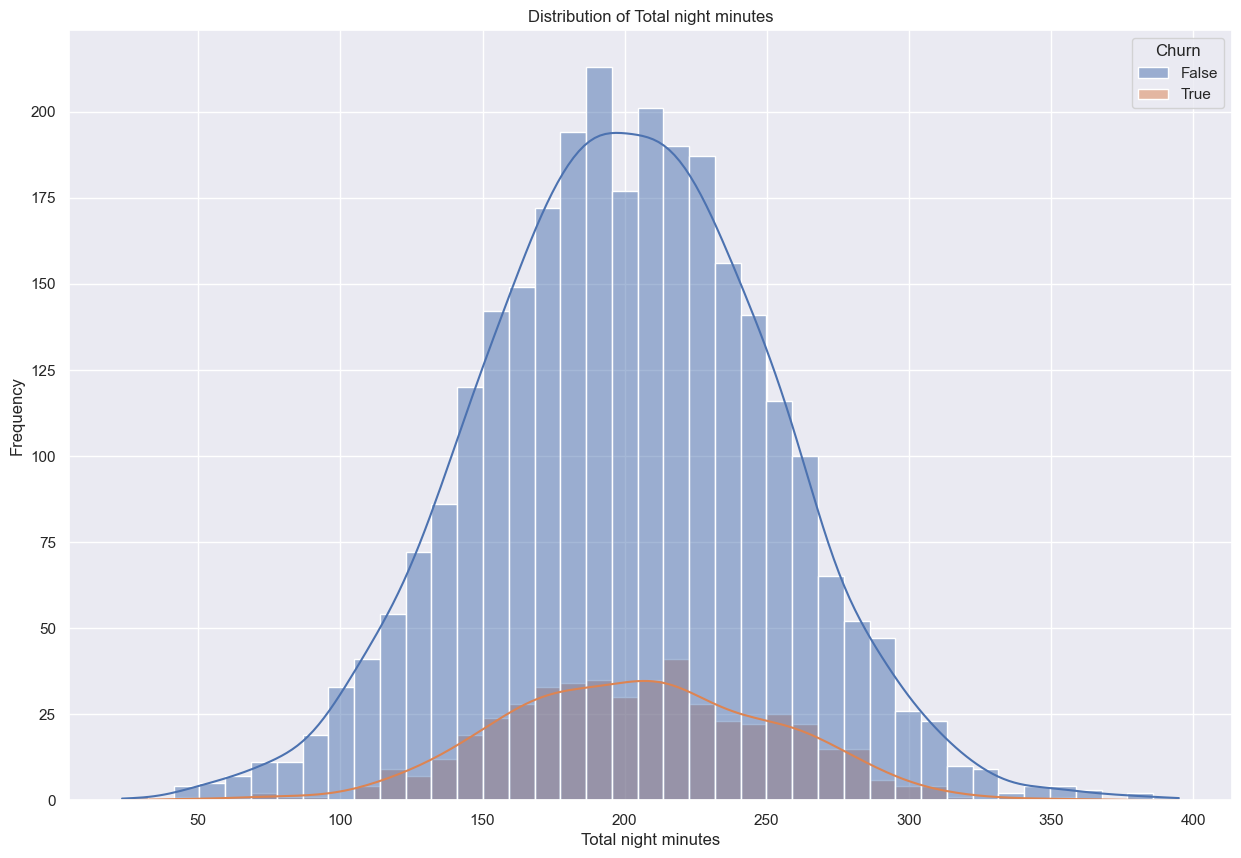

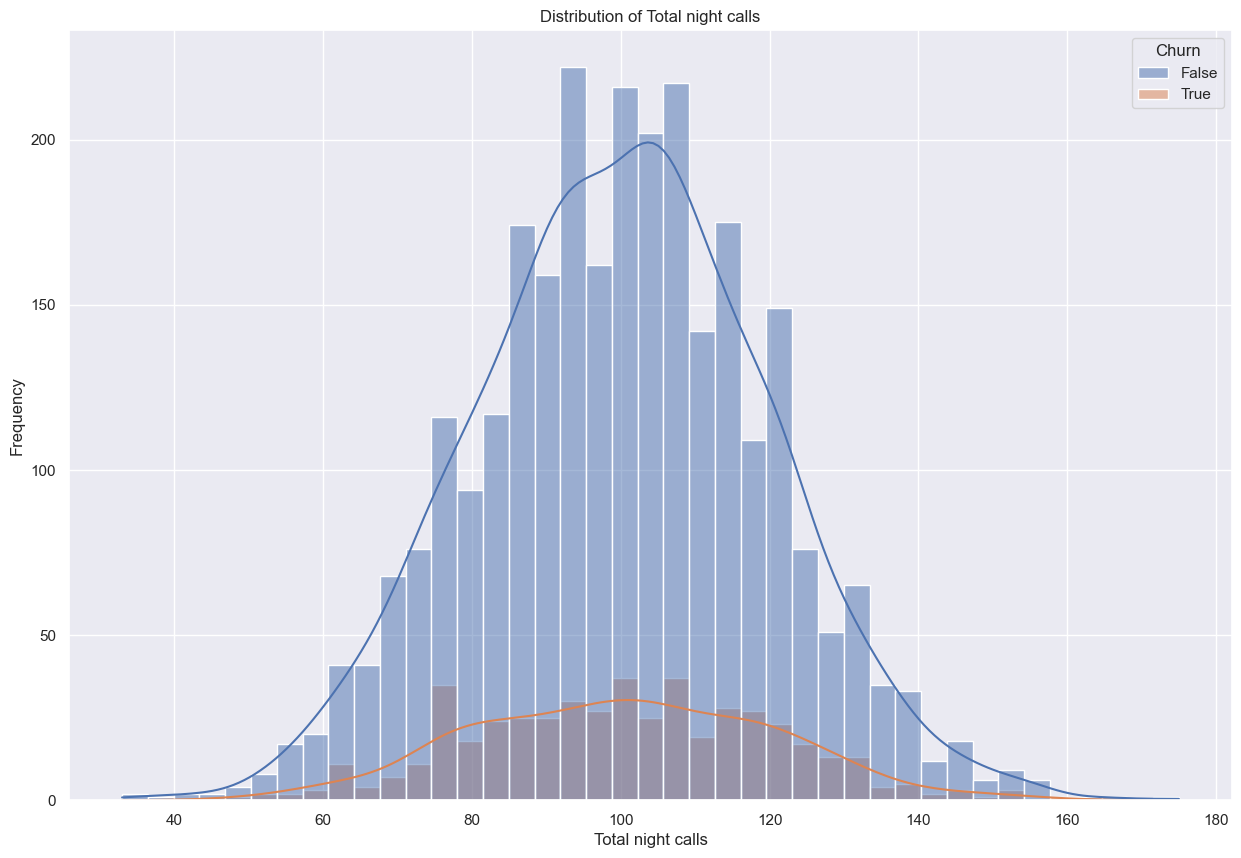

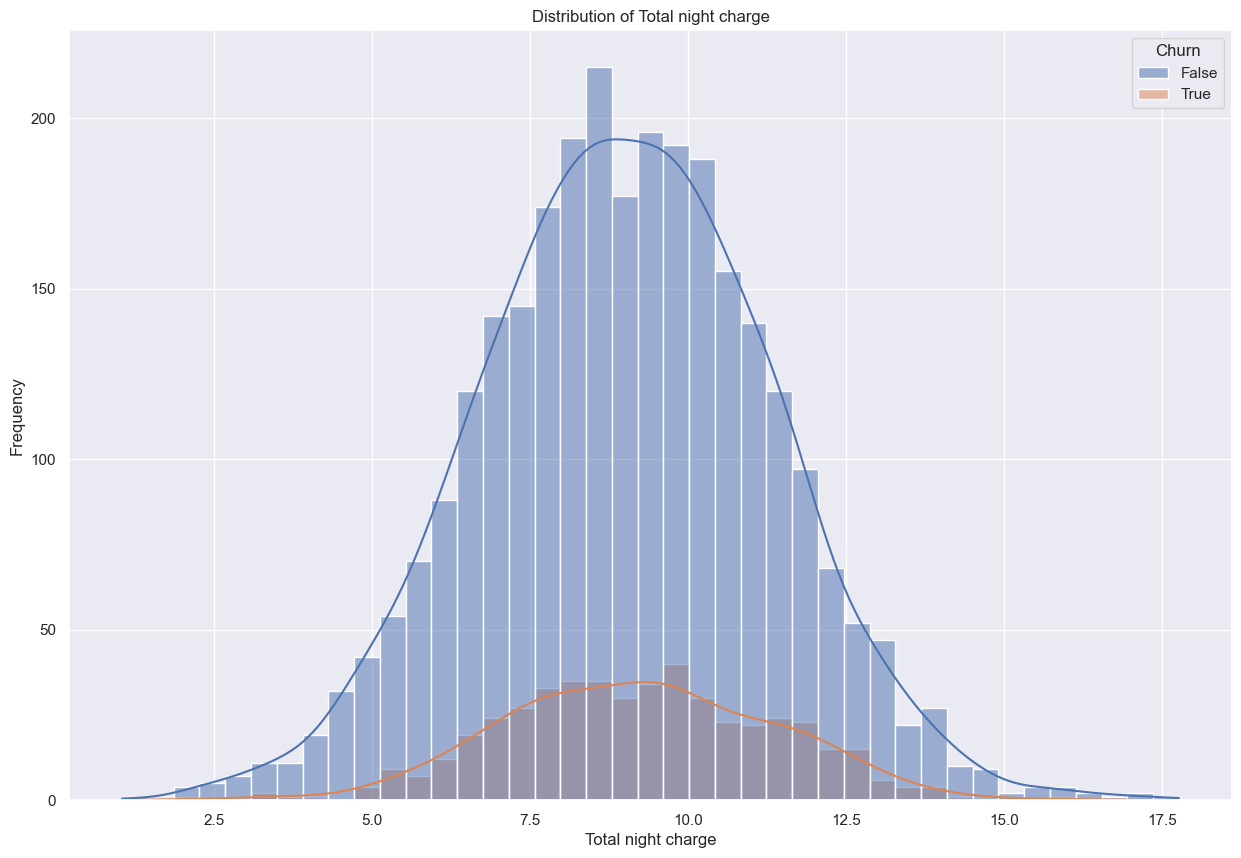

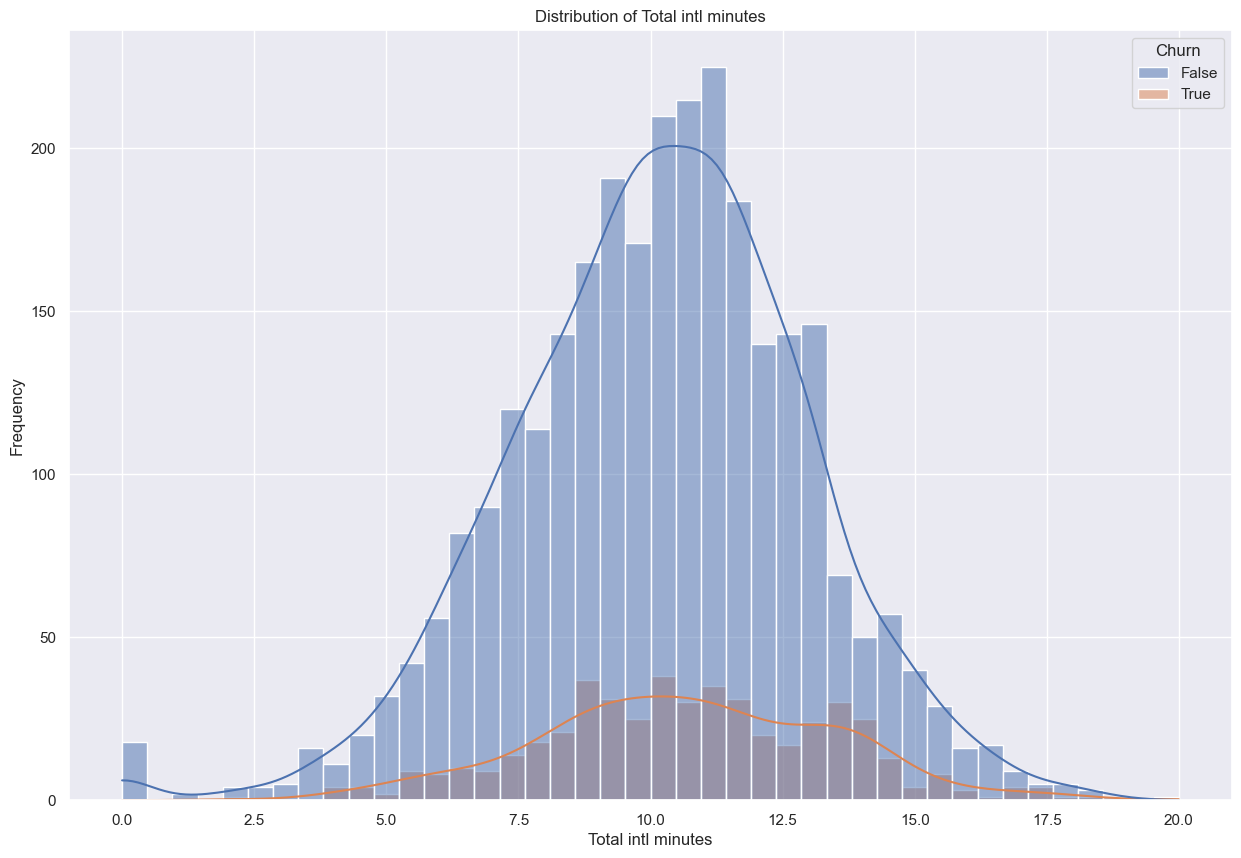

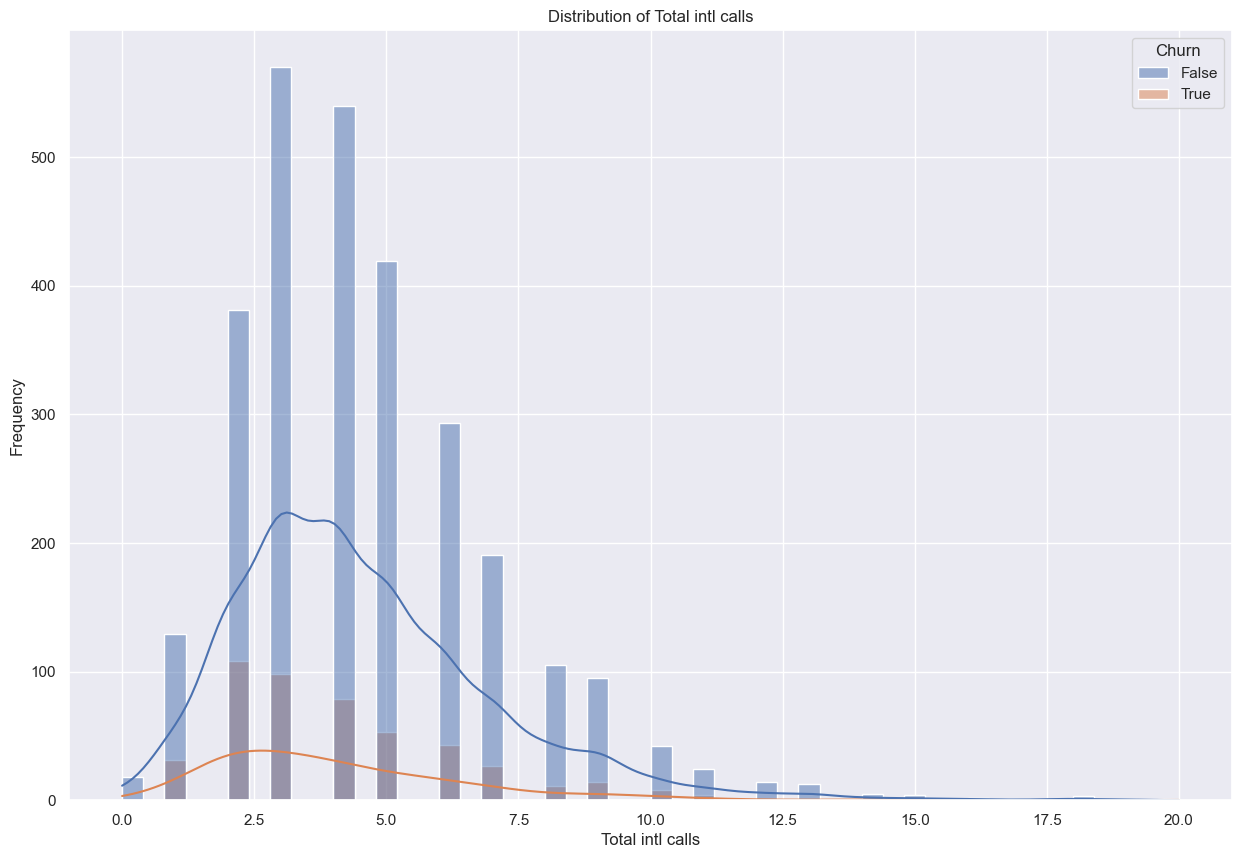

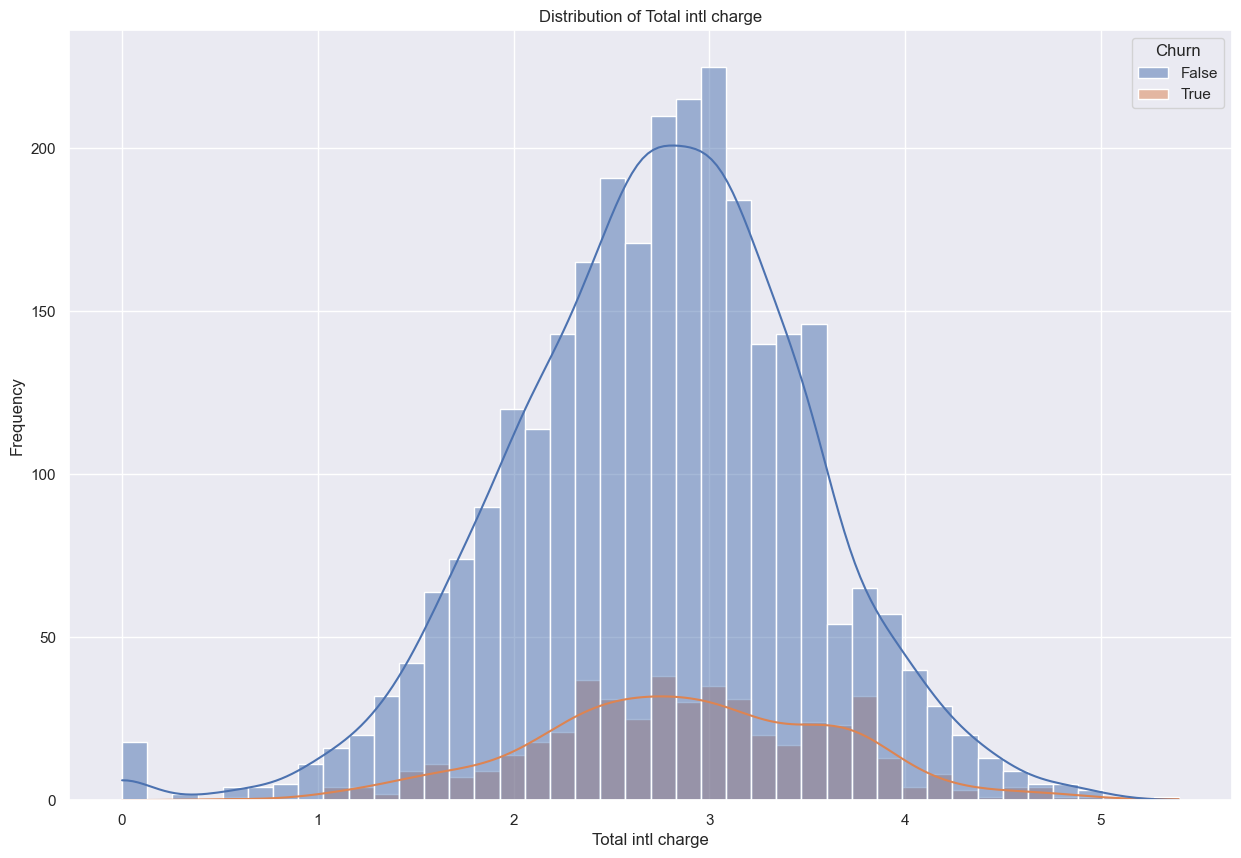

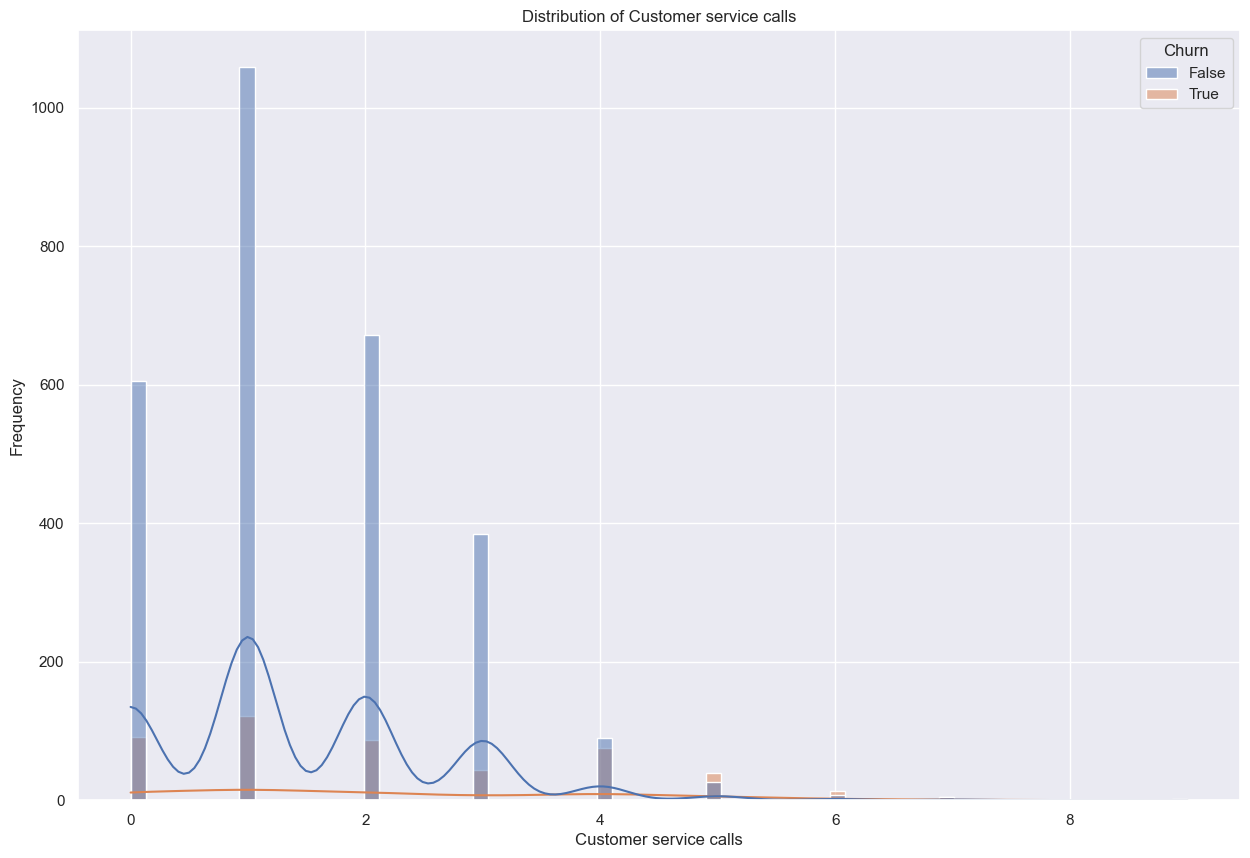

In [82]:
plt.figure(figsize=(5,5)) #Set the overall size of the figure

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object' and df[col].dtype != 'bool':
        sns.histplot(data=df, x=col, kde=True, hue='Churn') 
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')
        plt.xlabel(col)
        plt.show()  

In [83]:
from scipy.stats import chi2_contingency

In [84]:
contingency_table = pd.crosstab(df['State'],df['Churn'])

#calculate the chi square statistic and the p value
chi_square,p_value,_,_ = chi2_contingency(contingency_table)

#print the chi square and the p value
print('Chi_square :',chi_square)
print('P value :',p_value)

Chi_square : 83.04379191019663
P value : 0.002296221552011188


In [85]:
contingency_table = pd.crosstab(df['International plan'],df['Churn'])

#calculate the chi square statistic and the p value
chi_square,p_value,_,_ = chi2_contingency(contingency_table)

#print the chi square and the p value
print('Chi_square :',chi_square)
print('P value :',p_value)


Chi_square : 222.5657566499376
P value : 2.4931077033159556e-50


In [86]:
contingency_table = pd.crosstab(df['Voice mail plan'],df['Churn'])

#calculate the chi square statistic and the p value
chi_square,p_value,_,_ = chi2_contingency(contingency_table)

#print the chi square and the p value
print('Chi_square :',chi_square)
print('P value :',p_value)

Chi_square : 34.13166001075673
P value : 5.15063965903898e-09


CONCLUSION FROM THE STATISTICAL TEST

Using the chi square test to determine the relationship between the categorical features and the target variable

1. State and Churn: It showed that it has significant relationship between each other since the P_value is 0.00229
2. International Plan and Churn:A P_value of 2.49e-50 shows that there is a strong relationship between International plan and the likelihood to churn.
3. Voicemail Plan and Churn:  There was a significant relationship between each other since the P_value was observed to be        5.15e-09

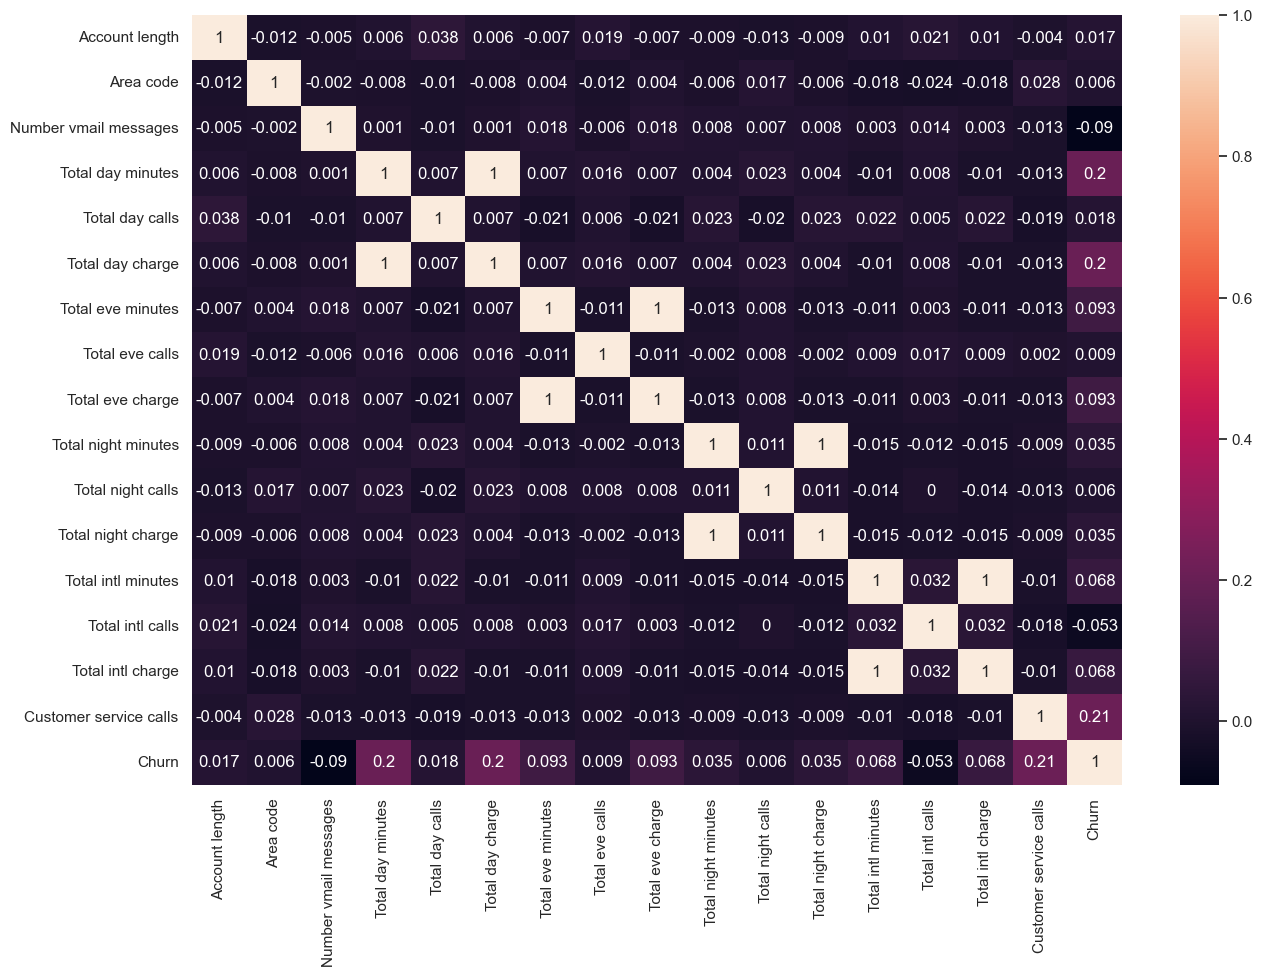

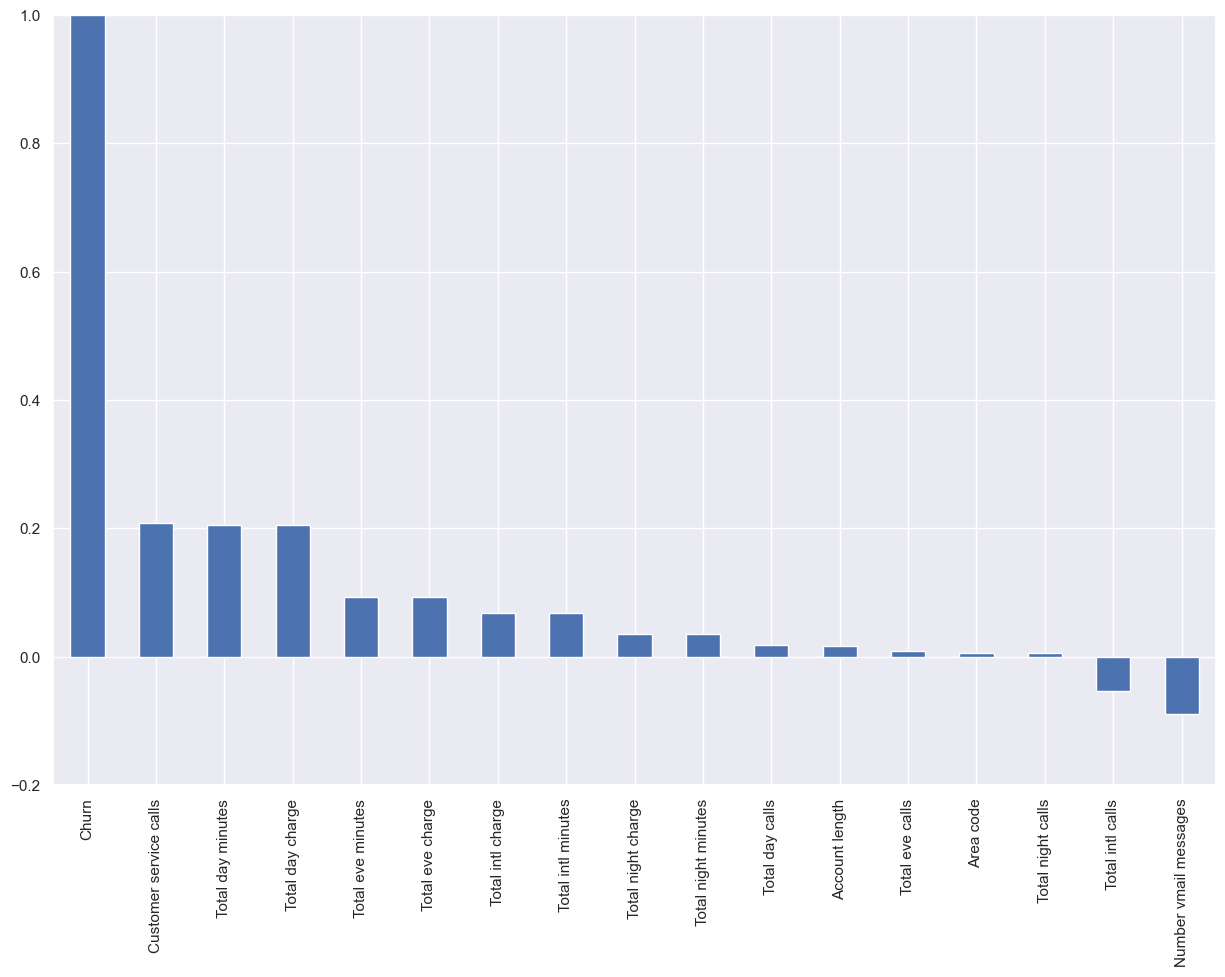

In [87]:
#The correlation between each feature

correlation= round(df.corr(),3)

#plotting the correlation
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)
plt.show()

#plotting the correlation
correl = df.corr()['Churn'].sort_values(ascending=False)
diagram = correl.plot(kind='bar')
plt.ylim(-0.2,1)
plt.show()

From the bar chart, it can be observed that:
    1. Customer service calls, Total day minutes and Today day Charges have a positive correlation of around 0.2 with Churn.       This means that, as they increase there is a more likelihood to churn.
    2. Number of vmail messages and Total international Calls have negative correlation of -0.09 and -0.053 respectively.This       means that, customers with more vmail messages and total international calls have a less likelihood to Churn 

In [88]:
df

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
5       AL             118        510                Yes              No   
6       MA             121        510                 No             Yes   
7       MO             147        415                Yes              No   
8       WV             141        415                Yes             Yes   
9       RI              74        415                 No              No   
10      IA             168        408                 No              No   
11      MT              95        510                 No              No   
12      IA              62        415                 No              No   
13      ID              85        408                 No             Yes   
14      VT              93        510                 No              No   
15      VA              76        510                 No             Yes   
16      TX              73        415                 No              No   
17      FL             147        415                 No              No   
18      CO              77        408                 No              No   
19      AZ             130        415                 No              No   
20      VA             132        510                 No              No   
21      NE             174        415                 No              No   
22      WY              57        408                 No             Yes   
23      MT              54        408                 No              No   
24      MO              20        415                 No              No   
25      IL             142        415                 No              No   
26      NH              75        510                 No              No   
27      LA             172        408                 No              No   
28      AZ              12        408                 No              No   
29      OK              57        408                 No             Yes   
30      GA              72        415                 No             Yes   
31      MA              78        415                 No              No   
32      AK             136        415                Yes             Yes   
33      NJ             149        408                 No              No   
34      GA              98        408                 No              No   
35      MD             135        408                Yes             Yes   
36      AR              34        510                 No              No   
37      ID             160        415                 No              No   
38      WI              64        510                 No              No   
39      OR              59        408                 No             Yes   
40      DE             142        408                 No              No   
41      WY              97        415                 No             Yes   
42      IA              52        408                 No              No   
43      IN              60        408                 No              No   
44      UT              96        415                 No              No   
45      WY              87        415                 No              No   
46      IN              81        408                 No              No   
47      CO             141        415                 No              No   
48      CO             121        408                 No             Yes   
49      OK             125        408                 No              No   
50      ID             174        408                 No              No   
51      CA             116        415                

In [89]:
df.drop('State',axis=1,inplace=True)

In [90]:
# mapping = {415:0,408:1,510:2}
# df['Area code']=df['Area code'].replace(mapping)
df

Account length  Area code International plan Voice mail plan  \
0                128        415                 No             Yes   
1                107        415                 No             Yes   
2                137        415                 No              No   
3                 84        408                Yes              No   
4                 75        415                Yes              No   
5                118        510                Yes              No   
6                121        510                 No             Yes   
7                147        415                Yes              No   
8                141        415                Yes             Yes   
9                 74        415                 No              No   
10               168        408                 No              No   
11                95        510                 No              No   
12                62        415                 No              No   
13                85        408                 No             Yes   
14                93        510                 No              No   
15                76        510                 No             Yes   
16                73        415                 No              No   
17               147        415                 No              No   
18                77        408                 No              No   
19               130        415                 No              No   
20               132        510                 No              No   
21               174        415                 No              No   
22                57        408                 No             Yes   
23                54        408                 No              No   
24                20        415                 No              No   
25               142        415                 No              No   
26                75        510                 No              No   
27               172        408                 No              No   
28                12        408                 No              No   
29                57        408                 No             Yes   
30                72        415                 No             Yes   
31                78        415                 No              No   
32               136        415                Yes             Yes   
33               149        408                 No              No   
34                98        408                 No              No   
35               135        408                Yes             Yes   
36                34        510                 No              No   
37               160        415                 No              No   
38                64        510                 No              No   
39                59        408                 No             Yes   
40               142        408                 No              No   
41                97        415                 No             Yes   
42                52        408                 No              No   
43                60        408                 No              No   
44                96        415                 No              No   
45                87        415                 No              No   
46                81        408                 No              No   
47               141        415                 No              No   
48               121        408                 No             Yes   
49               125        408                 No              No   
50               174        408                 No              No   
51               116        415                 No             Yes   
52               149        408                 No             Yes   
53                38        408                 No              No   
54                40        415                 No             Yes   
55                43        415                Yes              No   
56              

In [91]:
mapping = {415:0,408:1,510:2}
df['Area code']=df['Area code'].replace(mapping)

In [92]:
df.head(8)

Account length  Area code International plan Voice mail plan  \
0             128          0                 No             Yes   
1             107          0                 No             Yes   
2             137          0                 No              No   
3              84          1                Yes              No   
4              75          0                Yes              No   
5             118          2                Yes              No   
6             121          2                 No             Yes   
7             147          0                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   
7                      0              157.0               79   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   
6             37.09              348.5              108             29.62   
7             26.69              103.1               94              8.76   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6                       3  False  
7                       0  False

In [93]:
#converting all Nos and Yes to numbers

list=['International plan','Voice mail plan']
for i in list:
    df[i]=df[i].replace({"No":0,"Yes":1})

In [94]:
#converting all boolean values in Churn to 0s and 1s

df.replace([False, True], [0, 1], inplace=True)

In [95]:
df.head()

Account length  Area code  International plan  Voice mail plan  \
0             128          0                   0                1   
1             107          0                   0                1   
2             137          0                   0                0   
3              84          1                   1                0   
4              75          0                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

#splitting the dataset into target and independent variables
X = df.drop('Churn', axis=1)
y = df[]    

In [96]:
#splitting the dataset into targets and an independent variable
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [97]:
x.shape

(3333, 18)

In [98]:
y.shape

(3333,)

In [99]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [100]:
#since we are dealing with an imbalanced dataset, we have to oversample the minority class 
from imblearn.over_sampling import BorderlineSMOTE
smote= BorderlineSMOTE()

In [101]:
x_resampled,y_resampled = smote.fit_resample(x,y)

In [102]:
from collections import Counter

In [103]:
print("The number of classes before oversampling {}".format(Counter(y)))
print("The number of classes after oversampling {}".format(Counter(y_resampled)))

The number of classes before oversampling Counter({0: 2850, 1: 483})
The number of classes after oversampling Counter({0: 2850, 1: 2850})


In [104]:
y_resampled.shape

(5700,)

In [105]:
y_resampled.value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [108]:
print("The number of classes before oversampling {}".format(Counter(y)))
print("The number of classes after oversampling {}".format(Counter(y_resampled)))

The number of classes before oversampling Counter({0: 2850, 1: 483})
The number of classes after oversampling Counter({0: 2850, 1: 2850})


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score
from sklearn.metrics import precision_recall_curve


In [110]:
#Applying logistic regression
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr_pred= lr.predict(x_test)

accuracy_score_lr=accuracy_score(y_test,lr_pred)
confusion_matrix_lr= confusion_matrix(y_test,lr_pred)
classification_report_lr =classification_report(y_test,lr_pred)

print('Accuracy_score:',accuracy_score_lr)
print('Confusion matrix:\n',confusion_matrix_lr)
print('Classification report:\n',classification_report_lr)

Accuracy_score: 0.6833333333333333
Confusion matrix:
 [[385 190]
 [171 394]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       575
           1       0.67      0.70      0.69       565

    accuracy                           0.68      1140
   macro avg       0.68      0.68      0.68      1140
weighted avg       0.68      0.68      0.68      1140



In [111]:
#Applying Decision Tree classifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred= dt.predict(x_test)

accuracy_score_dt=accuracy_score(y_test,dt_pred)
confusion_matrix_dt= confusion_matrix(y_test,dt_pred)
classification_report_dt =classification_report(y_test,dt_pred)

print('Accuracy_score:',accuracy_score_dt)
print('Confusion matrix:\n',confusion_matrix_dt)
print('Classification report:\n',classification_report_dt)



Accuracy_score: 0.8526315789473684
Confusion matrix:
 [[483  92]
 [ 76 489]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       575
           1       0.84      0.87      0.85       565

    accuracy                           0.85      1140
   macro avg       0.85      0.85      0.85      1140
weighted avg       0.85      0.85      0.85      1140



In [112]:
#Applying Random Forest Classifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred= rf.predict(x_test)

accuracy_score_rf=accuracy_score(y_test,rf_pred)
confusion_matrix_rf= confusion_matrix(y_test,rf_pred)
classification_report_rf=classification_report(y_test,rf_pred)

print('Accuracy_score:',accuracy_score_rf)
print('Confusion matrix:\n',confusion_matrix_rf)
print('Classification report:\n',classification_report_rf)

Accuracy_score: 0.9377192982456141
Confusion matrix:
 [[553  22]
 [ 49 516]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       575
           1       0.96      0.91      0.94       565

    accuracy                           0.94      1140
   macro avg       0.94      0.94      0.94      1140
weighted avg       0.94      0.94      0.94      1140



In [113]:
#Applying Gradient Boosting Classifier
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred= gbc.predict(x_test)

accuracy_score_gbc=accuracy_score(y_test,gbc_pred)
confusion_matrix_gbc= confusion_matrix(y_test,gbc_pred)
classification_report_gbc =classification_report(y_test,gbc_pred)

print('Accuracy_score:',accuracy_score_gbc)
print('Confusion matrix:\n',confusion_matrix_gbc)
print('Classification report:\n',classification_report_gbc)

Accuracy_score: 0.8473684210526315
Confusion matrix:
 [[523  52]
 [122 443]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       575
           1       0.89      0.78      0.84       565

    accuracy                           0.85      1140
   macro avg       0.85      0.85      0.85      1140
weighted avg       0.85      0.85      0.85      1140



In [114]:
#Applying support vector classifier
sv= SVC(probability=True)
sv.fit(x_train,y_train)
sv_pred= sv.predict(x_test)

accuracy_score_sv=accuracy_score(y_test,sv_pred)
confusion_matrix_sv= confusion_matrix(y_test,sv_pred)
classification_report_sv =classification_report(y_test,sv_pred)

print('Accuracy_score:',accuracy_score_sv)
print('Confusion matrix:\n',confusion_matrix_sv)
print('Classification report:\n',classification_report_sv)

Accuracy_score: 0.6701754385964912
Confusion matrix:
 [[517  58]
 [318 247]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.90      0.73       575
           1       0.81      0.44      0.57       565

    accuracy                           0.67      1140
   macro avg       0.71      0.67      0.65      1140
weighted avg       0.71      0.67      0.65      1140



In [115]:
#Applying AdaBooost Classifier
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred= ad.predict(x_test)

accuracy_score_ad=accuracy_score(y_test,ad_pred)
confusion_matrix_ad= confusion_matrix(y_test,ad_pred)
classification_report_ad =classification_report(y_test,ad_pred)

print('Accuracy_score:',accuracy_score_ad)
print('Confusion matrix:\n',confusion_matrix_ad)
print('Classification report:\n',classification_report_ad)

Accuracy_score: 0.7719298245614035
Confusion matrix:
 [[450 125]
 [135 430]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       575
           1       0.77      0.76      0.77       565

    accuracy                           0.77      1140
   macro avg       0.77      0.77      0.77      1140
weighted avg       0.77      0.77      0.77      1140



In [116]:
#Applying KNeighbors Classifier
kn= KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred= kn.predict(x_test)

accuracy_score_kn=accuracy_score(y_test,kn_pred)
confusion_matrix_kn= confusion_matrix(y_test,kn_pred)
classification_report_kn =classification_report(y_test,kn_pred)

print('Accuracy_score:',accuracy_score_kn)
print('Confusion matrix:\n',confusion_matrix_kn)
print('Classification report:\n',classification_report_kn)

Accuracy_score: 0.8315789473684211
Confusion matrix:
 [[407 168]
 [ 24 541]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81       575
           1       0.76      0.96      0.85       565

    accuracy                           0.83      1140
   macro avg       0.85      0.83      0.83      1140
weighted avg       0.85      0.83      0.83      1140



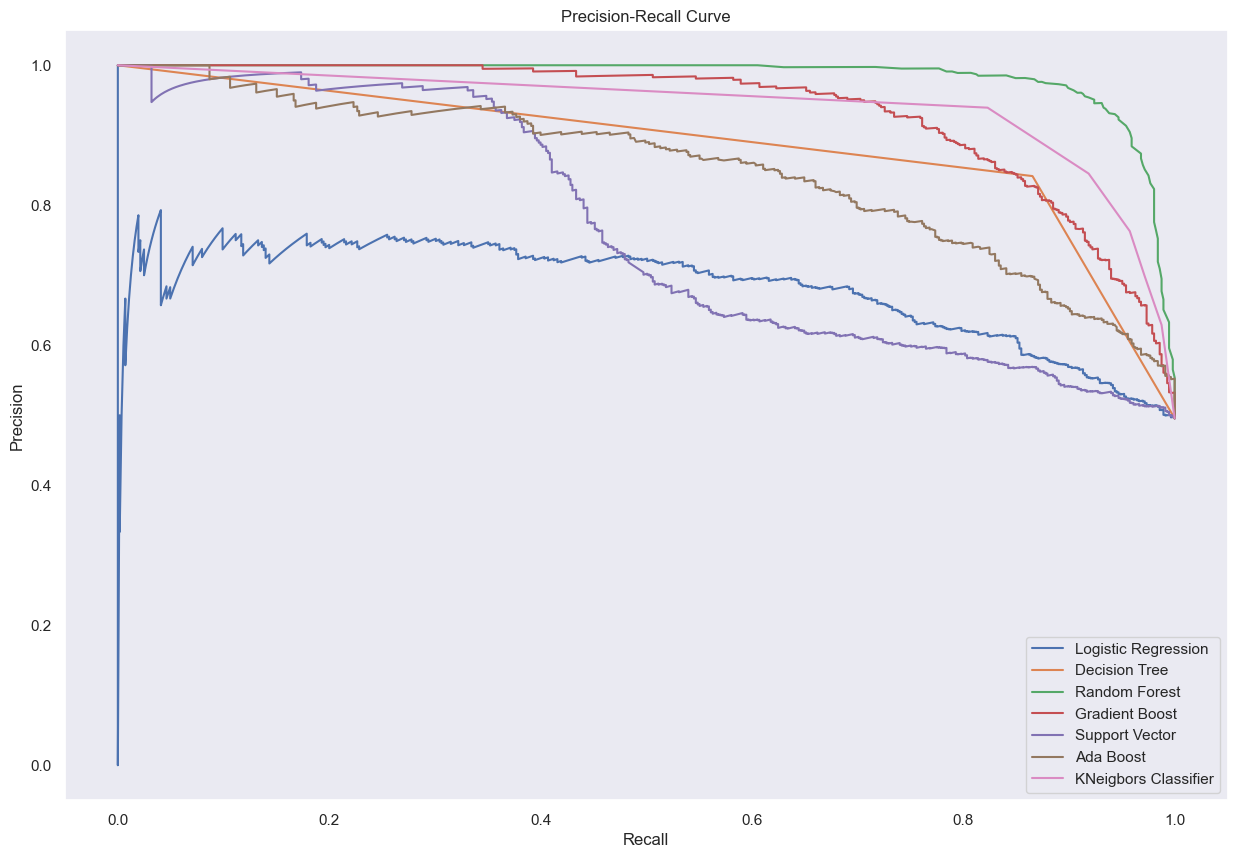

In [117]:
#precision recall curve values for logistic Regression 

lr_prc=lr.predict_proba(x_test)[:, 1]
lr_precision,lr_recall,thresholds_lr=precision_recall_curve(y_test,lr_prc)
plt.plot(lr_recall, lr_precision, label='Logistic Regression')

#precision recall curve values for DecisionTreeClassifier 

dt_prc=dt.predict_proba(x_test)[:, 1]
dt_precision,dt_recall,thresholds_dt=precision_recall_curve(y_test,dt_prc)
plt.plot(dt_recall, dt_precision, label='Decision Tree')

#precision recall curve values for RandomForestClassifier

rf_prc=rf.predict_proba(x_test)[:, 1]
rf_precision,rf_recall,thresholds_rf=precision_recall_curve(y_test,rf_prc)
plt.plot(rf_recall, rf_precision, label='Random Forest')

#precision recall curve values for GradientBoostingClassifier 

gbc_prc=gbc.predict_proba(x_test)[:, 1]
gbc_precision,gbc_recall,thresholds_gbc=precision_recall_curve(y_test,gbc_prc)
plt.plot(gbc_recall, gbc_precision, label='Gradient Boost')

#precision recall curve values for SupportVectorClassifier

sv_prc=sv.predict_proba(x_test)[:, 1]
sv_precision,sv_recall,thresholds_sv=precision_recall_curve(y_test,sv_prc)
plt.plot(sv_recall, sv_precision, label='Support Vector')

#precision recall curve values for AdaBoostClassifier

ad_prc=ad.predict_proba(x_test)[:, 1]
ad_precision,ad_recall,thresholds_ad=precision_recall_curve(y_test,ad_prc)
plt.plot(ad_recall, ad_precision, label='Ada Boost')

#precision recall curve values for KNeighborsClassifier

kn_prc=kn.predict_proba(x_test)[:, 1]
kn_precision,kn_recall,thresholds_kn=precision_recall_curve(y_test,kn_prc)
plt.plot(kn_recall, kn_precision, label='KNeigbors Classifier')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [118]:
#creating a dataframe to compare the metrics of each model

model=[('Logistic Regression',accuracy_score_lr,precision_score(y_test,lr_pred),recall_score(y_test,lr_pred),
        roc_auc_score(y_test,lr_pred),f1_score(y_test,lr_pred)),
        
       ('Decision Tree',accuracy_score_dt,precision_score(y_test,dt_pred),recall_score(y_test,dt_pred),
        roc_auc_score(y_test,dt_pred),f1_score(y_test,dt_pred)), 
        
        ('Random Forest',accuracy_score_rf,precision_score(y_test,rf_pred),recall_score(y_test,rf_pred),
        roc_auc_score(y_test,rf_pred),f1_score(y_test,rf_pred)),
         
         ('Gradient Boosting',accuracy_score_gbc,precision_score(y_test,gbc_pred),recall_score(y_test,gbc_pred),
        roc_auc_score(y_test,gbc_pred),f1_score(y_test,gbc_pred)),
          
          ('Support Vector',accuracy_score_sv,precision_score(y_test,sv_pred),recall_score(y_test,sv_pred),
        roc_auc_score(y_test,sv_pred),f1_score(y_test,sv_pred)),
           
           ('Ada Boost ',accuracy_score_ad,precision_score(y_test,ad_pred),recall_score(y_test,ad_pred),
        roc_auc_score(y_test,ad_pred),f1_score(y_test,ad_pred)),
            
            ('KNeighbors Classifier',accuracy_score_kn,precision_score(y_test,kn_pred),recall_score(y_test,kn_pred),
        roc_auc_score(y_test,kn_pred),f1_score(y_test,kn_pred) )
      ]

column_names=['Model','Accuracy','Precision','Recall','AUC-Score','F1_score']
           

In [119]:
model_comparison=pd.DataFrame(data=model, columns=column_names)
model_comparison

Model  Accuracy  Precision    Recall  AUC-Score  F1_score
0    Logistic Regression  0.683333   0.674658  0.697345   0.683455  0.685814
1          Decision Tree  0.852632   0.841652  0.865487   0.852743  0.853403
2          Random Forest  0.937719   0.959108  0.913274   0.937507  0.935630
3      Gradient Boosting  0.847368   0.894949  0.784071   0.846818  0.835849
4         Support Vector  0.670175   0.809836  0.437168   0.668149  0.567816
5             Ada Boost   0.771930   0.774775  0.761062   0.771835  0.767857
6  KNeighbors Classifier  0.831579   0.763047  0.957522   0.832674  0.849294

In [123]:
#calculating the feature importance

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_resampled,y_resampled)
importances= rf.feature_importances_
feature_names= x_resampled.columns

feature_importance_df= pd.DataFrame({'Feature':feature_names,
                                     'Importance':importances}).sort_values(by='Importance',ascending=False)

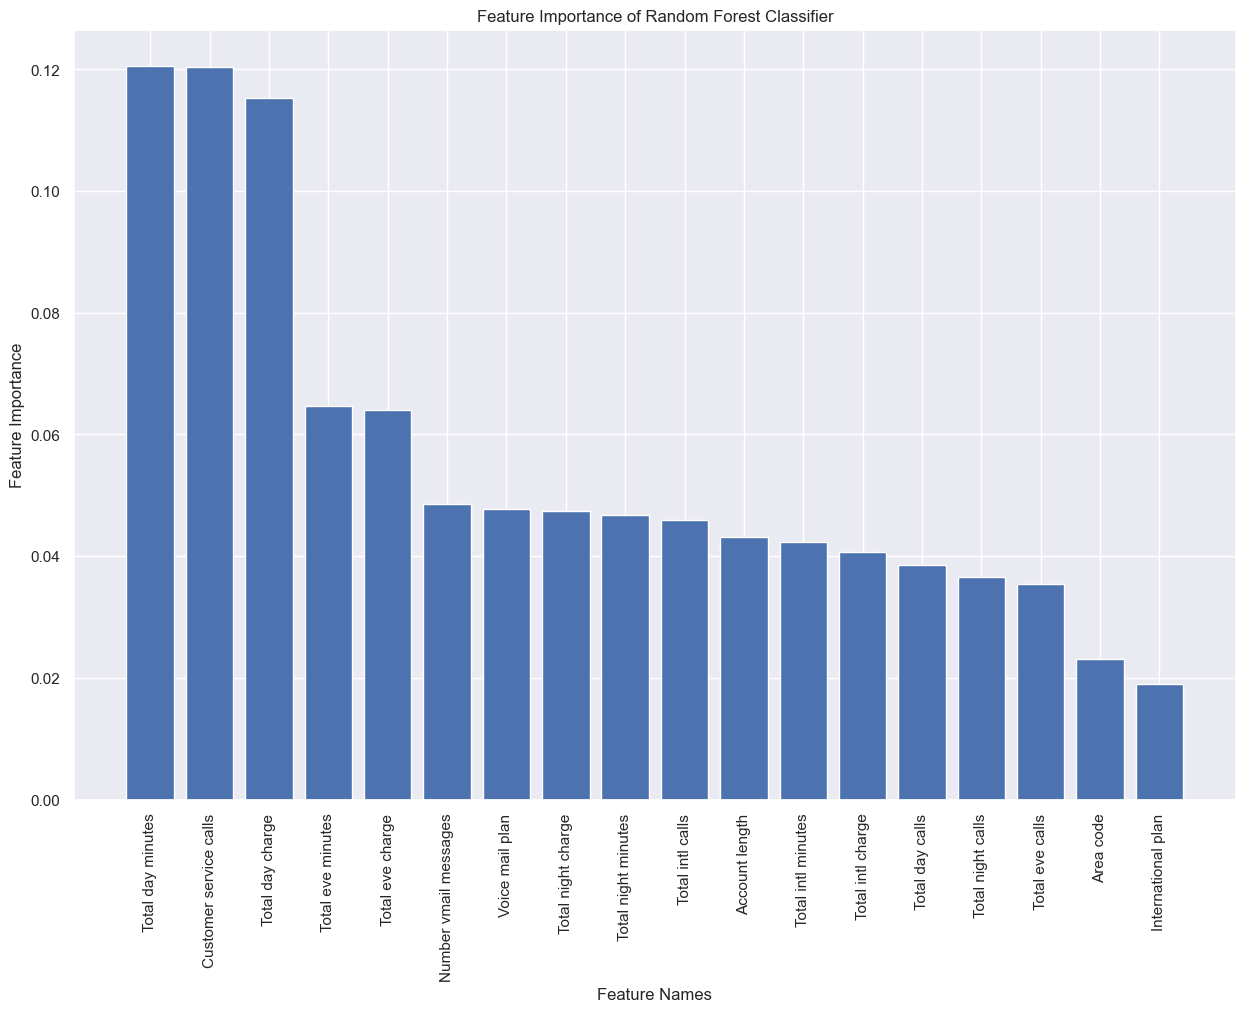

In [121]:
#plotting the feature importance of each features against the feature names

plt.bar(feature_importance_df['Feature'],feature_importance_df['Importance'])
plt.xlabel('Feature Names')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Random Forest Classifier')
plt.show()

In [122]:
feature_importance_df

Feature  Importance
5        Total day minutes    0.120491
17  Customer service calls    0.120426
7         Total day charge    0.115313
8        Total eve minutes    0.064670
10        Total eve charge    0.064015
4    Number vmail messages    0.048548
3          Voice mail plan    0.047715
13      Total night charge    0.047384
11     Total night minutes    0.046801
15        Total intl calls    0.045952
0           Account length    0.043151
14      Total intl minutes    0.042290
16       Total intl charge    0.040599
6          Total day calls    0.038525
12       Total night calls    0.036559
9          Total eve calls    0.035487
1                Area code    0.023137
2       International plan    0.018936

CONCLUSION
The project was a success in that it was able to identify the three most important features that contribute to customer churn: total day minutes, customer service calls,and total day charge. These findings can be used to develop targeted marketing campaigns and loyalty programs that are more likely to retain customers.

The project also found that the Random Forest model outperformed the other models in terms of accuracy, precision, recall, AUC-score, and F1-score. This suggests that Random Forest model is a promising approach for predicting customer churn.
